In [1]:
from google.colab import drive  
drive._mount('/content/drive')  

Mounted at /content/drive


In [2]:
!pip install tensorflow
import tensorflow as tf
!pip install -q keras
import keras

In [13]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape =(256,256,3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (3, 3)))




# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(5, activation = 'softmax'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                  rescale=1./255,
                                  shear_range=0.2,
                                   zoom_range=0.2,
                                    horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

print(classifier.summary())


training_1= train_datagen.flow_from_directory('/content/drive/MyDrive/Original_Images/Training/DR',
                                                 target_size = (256,256),
                                                    batch_size =32,classes=['DR_0','DR_1','DR_2','DR_3','DR_4'],
                                                 class_mode = 'categorical',save_format='jpg'
                                                  )

test_1 = test_datagen.flow_from_directory('/content/drive/MyDrive/Original_Images/test/DR',
                                            target_size = (256,256),
                                            batch_size = 32,classes=['DR_0','DR_1','DR_2','DR_3','DR_4'],
                                            class_mode = 'categorical',save_format='jpg'
                                          )

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 85, 85, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 28, 28, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 576)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [17]:
413/32

12.90625

In [18]:
history=classifier.fit(training_1,validation_data=test_1,epochs =100,steps_per_epoch=12)

Epoch 1/100
12/12 [==============================] - 84s 7s/step - loss: 1.4098 - accuracy: 0.4226 - val_loss: 1.4741 - val_accuracy: 0.3204
Epoch 2/100
12/12 [==============================] - 80s 7s/step - loss: 1.3826 - accuracy: 0.4488 - val_loss: 1.4344 - val_accuracy: 0.3981
Epoch 3/100
12/12 [==============================] - 80s 7s/step - loss: 1.3792 - accuracy: 0.4357 - val_loss: 1.4192 - val_accuracy: 0.3786
Epoch 4/100
12/12 [==============================] - 80s 7s/step - loss: 1.3700 - accuracy: 0.4331 - val_loss: 1.4748 - val_accuracy: 0.3398
Epoch 5/100
12/12 [==============================] - 80s 7s/step - loss: 1.3420 - accuracy: 0.4751 - val_loss: 1.4132 - val_accuracy: 0.3786
Epoch 6/100
12/12 [==============================] - 80s 7s/step - loss: 1.3332 - accuracy: 0.4514 - val_loss: 1.4588 - val_accuracy: 0.3786
Epoch 7/100
12/12 [==============================] - 80s 7s/step - loss: 1.3199 - accuracy: 0.4593 - val_loss: 1.4631 - val_accuracy: 0.3981
Epoch 8/100
1

In [20]:
print(classifier.evaluate(training_1))
classifier.save('my_model_dr_256.hdf5')

13/13 [==============================] - 64s 5s/step - loss: 1.0435 - accuracy: 0.5593
[1.0434561967849731, 0.5593220591545105]


In [21]:
#Confution Matrix and Classification Report
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
validation_generator=test_1
batch_size = 32
steps = 103/ batch_size
Y_pred = classifier.predict_generator(validation_generator,steps)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['DR_0','DR_1','DR_2','DR_3','DR_4']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


Confusion Matrix
[[ 1  0 28  5  0]
 [ 0  0  5  0  0]
 [ 7  0 16  9  0]
 [ 1  0 17  1  0]
 [ 2  0  4  7  0]]
Classification Report
              precision    recall  f1-score   support

        DR_0       0.09      0.03      0.04        34
        DR_1       0.00      0.00      0.00         5
        DR_2       0.23      0.50      0.31        32
        DR_3       0.05      0.05      0.05        19
        DR_4       0.00      0.00      0.00        13

    accuracy                           0.17       103
   macro avg       0.07      0.12      0.08       103
weighted avg       0.11      0.17      0.12       103



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


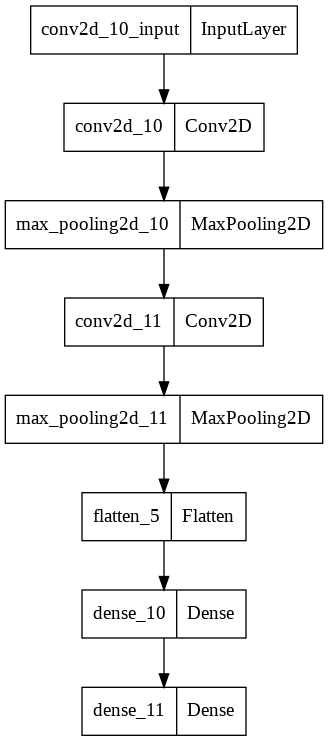

In [25]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='model.png')

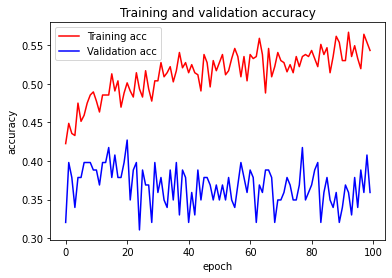

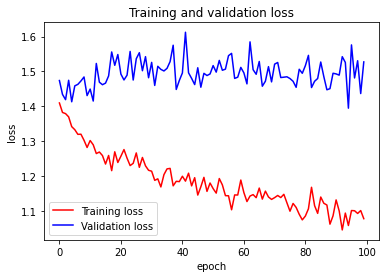

In [24]:

import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time


#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel("accuracy") 
plt.xlabel("epoch")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and validation loss")
plt.ylabel("loss") 
plt.xlabel("epoch")
plt.legend()
plt.show()


# New Section

In [31]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Original_Images/Training/DR'
valid_path = '/content/drive/MyDrive/Original_Images/test/DR'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable =False
  

  
  # useful for getting number of classes

  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(5, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Original_Images/Training/DR',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Original_Images/test/DR',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [29]:
413/16

25.8125

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
25/25 [==============================] - 285s 11s/step - loss: 1.9524 - accuracy: 0.3451 - val_loss: 1.7689 - val_accuracy: 0.3592
Epoch 2/30
25/25 [==============================] - 282s 11s/step - loss: 1.3446 - accuracy: 0.4610 - val_loss: 1.5638 - val_accuracy: 0.3107
Epoch 3/30
25/25 [==============================] - 283s 11s/step - loss: 1.3659 - accuracy: 0.4559 - val_loss: 1.6450 - val_accuracy: 0.2913
Epoch 4/30
25/25 [==============================] - 283s 11s/step - loss: 1.2294 - accuracy: 0.5239 - val_loss: 1.5903 - val_accuracy: 0.2718
Epoch 5/30
25/25 [==============================] - 281s 11s/step - loss: 1.2751 - accuracy: 0.4987 - val_loss: 1.6378 - val_accuracy: 0.3204
Epoch 6/30
25/25 [==============================] - 281s 11s/step - loss: 1.2475 - accuracy: 0.5189 - val_loss: 1.9138 - val_accuracy: 0.3398
Epoch 7/30
25/25 [==============================] - 281s 11s/step - loss: 1.2897 - accuracy: 0.4912 - val_loss: 1.4862 - val_accuracy: 0.3883
Epoch 

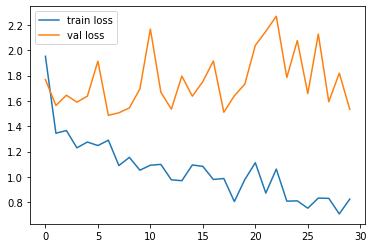

<Figure size 432x288 with 0 Axes>

In [32]:

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=25
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


import tensorflow as tf

from keras.models import load_model

model.save('new_model_vgg_16.h5')

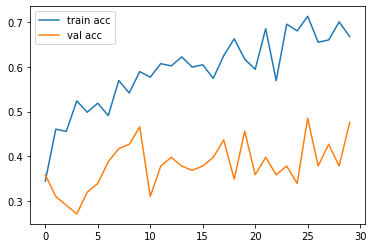

<Figure size 432x288 with 0 Axes>

In [33]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [34]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
validation_generator=test_set
Y_pred = model.predict_generator(validation_generator,103)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['DR_0','DR_1','DR_2','DR_3','DR_4']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


Confusion Matrix
[[14  1 14  2  3]
 [ 1  1  1  1  1]
 [13  1 11  4  3]
 [ 9  0  5  4  1]
 [ 5  0  6  2  0]]
Classification Report
              precision    recall  f1-score   support

        DR_0       0.33      0.41      0.37        34
        DR_1       0.33      0.20      0.25         5
        DR_2       0.30      0.34      0.32        32
        DR_3       0.31      0.21      0.25        19
        DR_4       0.00      0.00      0.00        13

    accuracy                           0.29       103
   macro avg       0.25      0.23      0.24       103
weighted avg       0.28      0.29      0.28       103



In [35]:
print(model.evaluate(test_set))

7/7 [==============================] - 58s 8s/step - loss: 1.5336 - accuracy: 0.4757
[1.5335688591003418, 0.4757281541824341]
